In [ ]:
!pip install transformers

In [ ]:
!pip install pandas nltk seaborn matplotlib
import pandas as pd
import nltk
from nltk.corpus import stopwords
import re
from transformers import pipeline
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
data = pd.read_csv('twitter_dataset.csv')
data.head()
texts = data[['Text']]

In [ ]:
texts['LowerText']=texts['Text'].str.lower()
texts['RemovePunc']=texts['LowerText'].apply(lambda x: re.sub(r'[^\w\s]','',x))
STOPWORDS = set(stopwords.words('english'))
texts['RemoveStopwords']=texts['RemovePunc'].apply(lambda x: ' '.join([word for word in x.split() if word not in (STOPWORDS)]))

/tmp/ipython-input-4210955831.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  texts['LowerText']=texts['Text'].str.lower()
/tmp/ipython-input-4210955831.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  texts['RemovePunc']=texts['LowerText'].apply(lambda x: re.sub(r'[^\w\s]','',x))
/tmp/ipython-input-4210955831.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

In [ ]:
sentiment_analyzer=pipeline("sentiment-analysis",
model = "distilbert-base-uncased-finetuned-sst-2-english")


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Device set to use cpu


In [ ]:
texts['Sentiment']=texts['RemoveStopwords'].map(lambda x : sentiment_analyzer(x)[0]['label'].lower())

/tmp/ipython-input-2188030720.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  texts['Sentiment']=texts['RemoveStopwords'].map(lambda x : sentiment_analyzer(x)[0]['label'].lower())


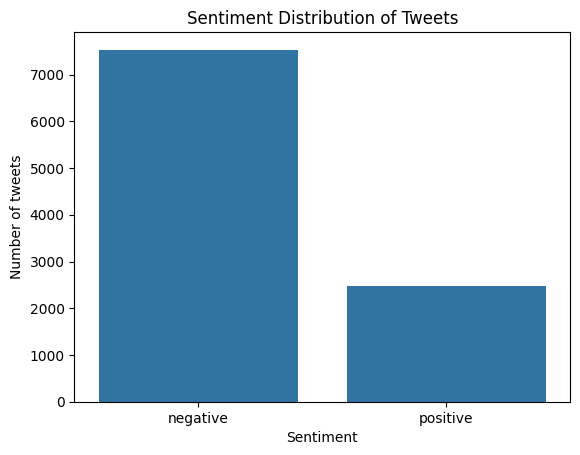

In [ ]:
counter = Counter(texts["Sentiment"])

sns.barplot(x=list(counter.keys()), y=list(counter.values()))
plt.xlabel('Sentiment')
plt.ylabel("Number of tweets")
plt.title("Sentiment Distribution of Tweets")
plt.show()
